# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheter or not someone has heart disease based on their medical attributes.


We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problen Definition

In a statement,
> Given clinical parameters about a patient, can we predict whetehr or not they have heart disease?

## 2. Data

The original data came from Clevland data from the UTI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+disease. 
The downloaded csv file version came from Kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting wheter or not a patent has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0 Typical angina: chest pain related decrease blood supply to the heart
   * 1 Atypical angina: chest pain not related to heart
   * 2 Non-anginal pain: typically esophageal spasms (non heart related)
   * 3 Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
 * colored vessel means the doctor can see the blood passing through
 * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Prepapring the tools

We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation

In [2]:
# Exploratory Data Analysis and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [108]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataframe has 303 rows and 14 columns.


## Exporartory Data Analysis

#### First 10 rows

In [110]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Last 10 rows

In [111]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#### View count of classes in target column

In [112]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

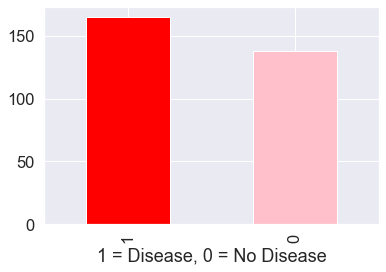

In [113]:
fig = df["target"].value_counts().plot.bar(color=["Red", "pink"])
plt.xlabel("1 = Disease, 0 = No Disease");

#### Summary of a DataFrame

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [115]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Check for null values

In [116]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart Disease Frequency relative to Gender

In [117]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [118]:
#Compare target colum with sex columns
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


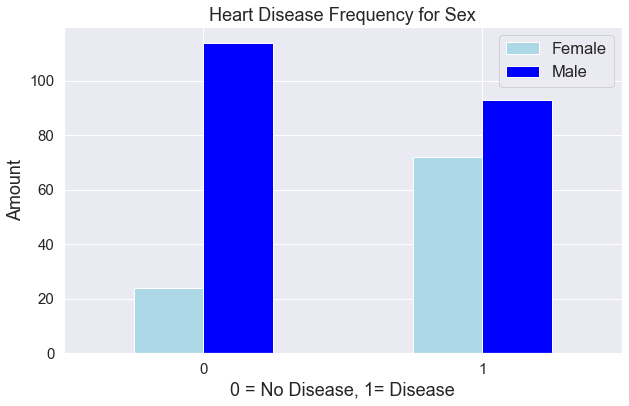

In [119]:
pd.crosstab(df["target"], df["sex"]).plot.bar(figsize=(10, 6),
                                             color = ["lightblue", "blue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.tick_params(axis='both', labelsize=15)
plt.xticks(rotation= 0);


## Heart Disease Frequency relative to Chest Pain type
cp - chest pain type
* 0 Typical angina: chest pain related decrease blood supply to the heart
* 1 Atypical angina: chest pain not related to heart
* 2 Non-anginal pain: typically esophageal spasms (non heart related)
* 3 Asymptomatic: chest pain not showing signs of disease

In [120]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [121]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


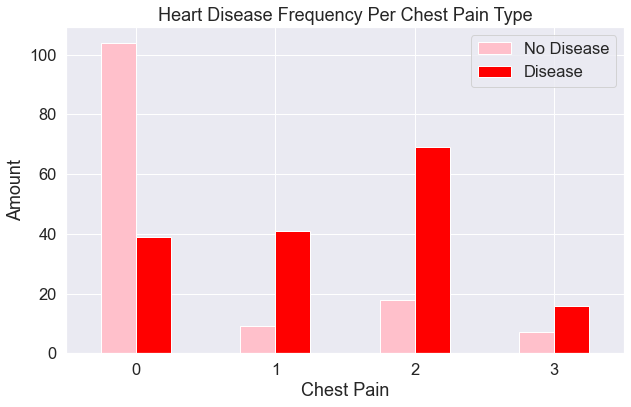

In [122]:
pd.crosstab(df['cp'], df['target']).plot.bar(color=["Pink", "Red"],
                                            figsize=(10,6))

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for Heart Disease

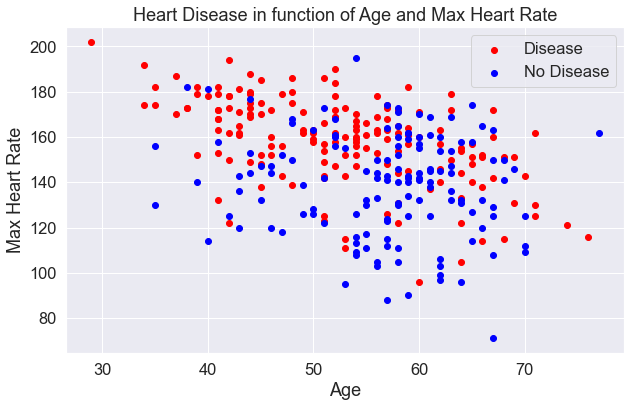

In [123]:
plt.figure(figsize=(10, 6))
# Heartrate for patients with heart disease
plt.scatter(df[df["target"] == 1]["age"],
            df[df["target"] == 1]["thalach"],
           c="red")
# Heartrate for patients without heart disease
plt.scatter(df[df["target"]==0]["age"],
            df[df["target"]==0]["thalach"],
           c="blue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

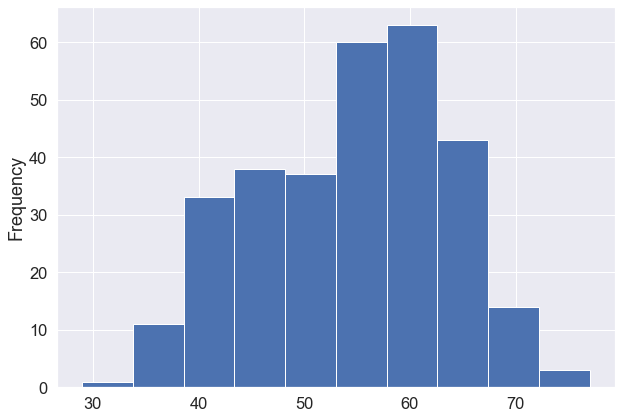

In [124]:
### Distribution of the age
df["age"].plot.hist(figsize=(10,7));

## Correlation of features to target variable

In [125]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


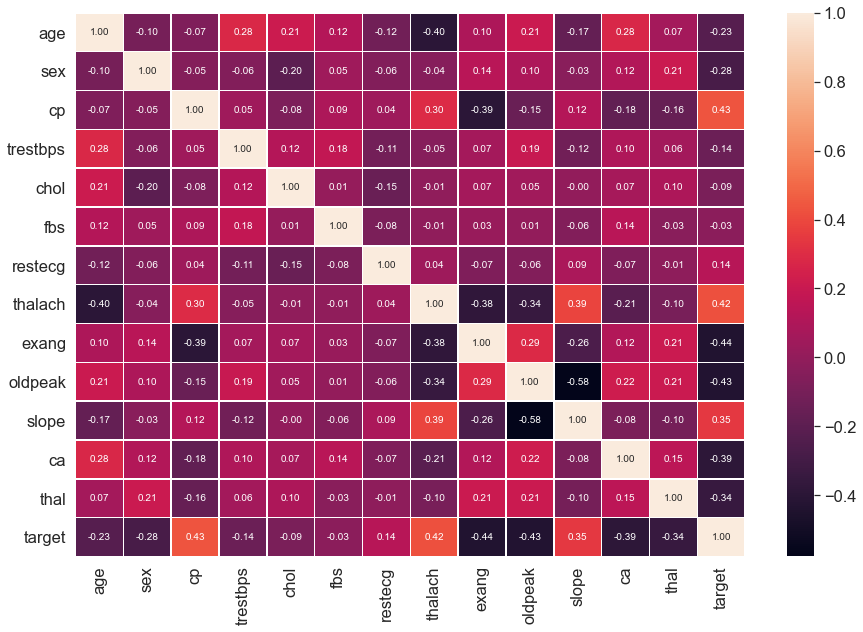

In [126]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (15, 10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt=".2f")

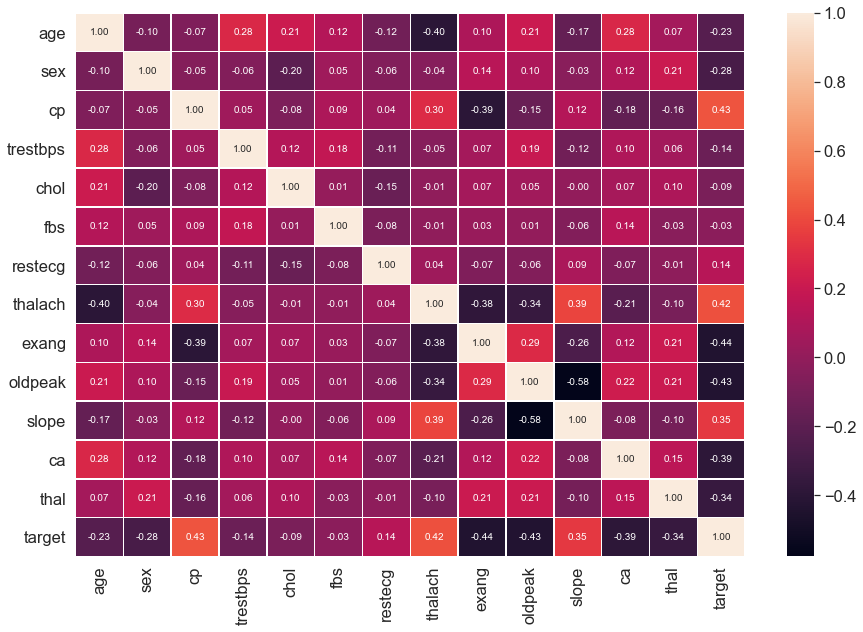

In [127]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (15, 10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt=".2f")

## 5. Modelling

In [128]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Split X/y

In [129]:
X = df.drop("target", axis =1)
y= df["target"]

#### Split data into training/testing

In [130]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## We're going to try three different Models
1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier

In [131]:
# Dictionary to try the models

models = {"LogRegression": LogisticRegression(), 
         "KNeighbors": KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier()}

# Function to fit and score models

def fit_and_score(modles, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [132]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LogRegression': 0.8852459016393442,
 'KNeighbors': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

#### Model Comparison

In [133]:
scores_df = pd.DataFrame(model_scores, index=["Accuracy Scores"])
print("Default score metrics")
scores_df

Default score metrics


,LogRegression,KNeighbors,RandomForest
Accuracy Scores,0.885246,0.688525,0.836066


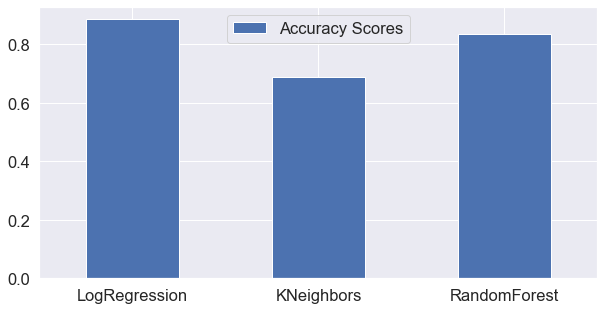

In [134]:
scores_df.T.plot.bar(figsize= (10,5))
plt.xticks(rotation=0);

## Experimentation
* Hyperperameter tuning
* Feature importance
* Classification metrics:
    * Confusion matrix
    * Cross-validation
    * Pricision
    * Recall
    * F1 score
    * Classification rport
    * ROC curve
    * Area under the curve (AUC)

### Hyperparameter Tuning

### KNN

In [135]:
train_scores = []
test_scores = []

# List of different values for parameter neighbors
knn = KNeighborsClassifier()
neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors= i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [136]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [137]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Highest test score when tuning n_neighbors:  75.41%


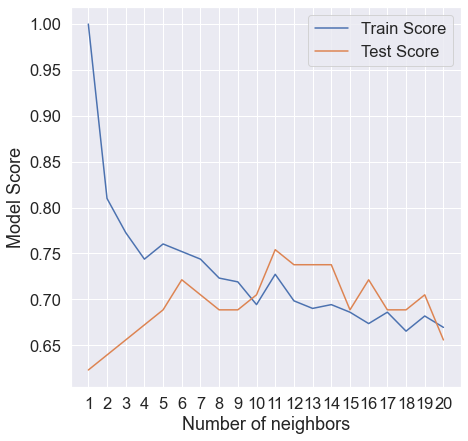

In [138]:
fig, ax = plt.subplots(figsize= (7,7))
ax = plt.plot(neighbors, train_scores, label="Train Score"),
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Highest test score when tuning n_neighbors: {max(test_scores)*100: .2f}%")

In [139]:
#### try randomizedsearchCV on KNN

### Logistic Regression
Hyperparameter tuning using RandomizedSeachCV

In [140]:
# Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":['newton-cg', 'lbfgs', 'liblinear']}

In [141]:
# Tune LogisticRegression
np.random.seed(42)

randsearch_log_reg = RandomizedSearchCV(estimator= LogisticRegression(),
                                       param_distributions=log_reg_grid,
                                       cv=5,
                                       n_iter =20,
                                       verbose= True)

# Fit Random Hyperparameter search model for logisticRegeression
randsearch_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   verbose=True)

In [142]:
# Best Parameteres

randsearch_log_reg.best_params_


{'solver': 'lbfgs', 'C': 206.913808111479}

In [143]:

randsearch_log_reg.score(X_test, y_test)

0.8688524590163934

### RandomForestClassifier

In [144]:
# Hyperparameter grid for RandomForestClassifier
RandForest_grid = {"n_estimators": np.arange(10,1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [145]:
# Tune RandomForestClassifier
randsearch_RandForest = RandomizedSearchCV(estimator= RandomForestClassifier(),
                                          param_distributions=RandForest_grid,
                                          cv = 5,
                                          verbose= True, 
                                          n_iter= 50)

# Fit Random Hyperparameter search model for RandForestClassier
randsearch_RandForest.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [146]:
# The best hyperparameters
randsearch_RandForest.best_params_

{'n_estimators': 110,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [147]:
# Evaluate RandomForestClossifer accuracy score
randsearch_RandForest.score(X_test, y_test)

0.8524590163934426

## Hyperparamter Tuning LogisticRegression with GridSearchCV

In [148]:
randsearch_log_reg.best_params_

{'solver': 'lbfgs', 'C': 206.913808111479}

In [149]:
log_reg_grid2 = {'solver': ['lbfgs'],
                "C": np.logspace(-4,4,20)}

In [150]:
GridSrch_Log_Reg = GridSearchCV(estimator = LogisticRegression(),
                               param_grid= log_reg_grid2,
                               cv =5,
                               verbose= True)

GridSrch_Log_Reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['lbfgs']},
             verbose=True)

In [151]:
# Check the best hyperparameters
GridSrch_Log_Reg.best_params_

{'C': 206.913808111479, 'solver': 'lbfgs'}

In [152]:
GridSrch_Log_Reg.score(X_test, y_test)

0.8688524590163934

# Evaluation of tuned machine learning classifier, beyond default accuracy score

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [153]:
# Make predictions on tuned model

y_preds = GridSrch_Log_Reg.predict(X_test)
y_preds[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

#### ROC curve and AUC score

In [154]:
from sklearn.metrics import roc_curve
roc_curve(y_test, y_preds)

(array([0.        , 0.13793103, 1.        ]),
 array([0.   , 0.875, 1.   ]),
 array([2, 1, 0], dtype=int64))

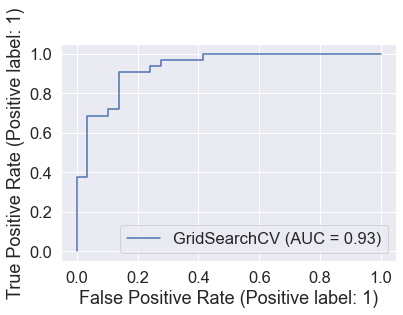

In [155]:
plot_roc_curve(GridSrch_Log_Reg,X_test,y_test)

### Confusion matrix

In [156]:
confu_mat = confusion_matrix(y_test, y_preds)
confu_mat

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [157]:
from sklearn.metrics import plot_confusion_matrix

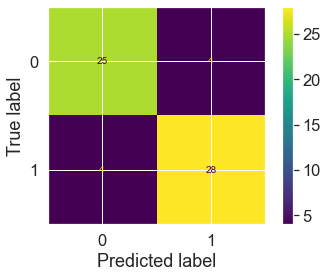

In [158]:
plot_confusion_matrix(GridSrch_Log_Reg, X_test, y_test);

### Classification report

In [159]:
class_report = classification_report(y_test, y_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Calcuclate evaluation metrics using cross-validation

In [160]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [161]:
# check best hyperparameters
GridSrch_Log_Reg.best_params_

{'C': 206.913808111479, 'solver': 'lbfgs'}

In [162]:
# Createn new classifier with best parameters
clf = LogisticRegression(C= 206.913808111479, 
                         solver= 'lbfgs' )

# Cross Validation of accuracy score
cv_accur = cross_val_score(clf, 
                X,
                y,
                scoring='accuracy',
                cv=5)

cv_accur_mean = np.mean(cv_acc)
cv_accur_mean

0.8248633879781421

### Precision

In [163]:
precision_score(y_test, y_preds)

0.875

In [164]:
# Cross Validation of accuracy score
cv_precision = cross_val_score(clf, 
                X,
                y,
                scoring='precision',
                cv=5)

cv_precision_mean = np.mean(cv_acc)
cv_precision_mean

0.8248633879781421

### Recall

In [165]:
recall_score(y_test, y_preds)

0.875

In [166]:
#Cross Validation of recall_score
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           scoring='recall',
                           cv= 5)

cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.8787878787878787

### F1

In [167]:
f1_score(y_test, y_preds)

0.875

In [168]:
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       scoring= "f1",
                       cv= 5)

cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.84664075774841

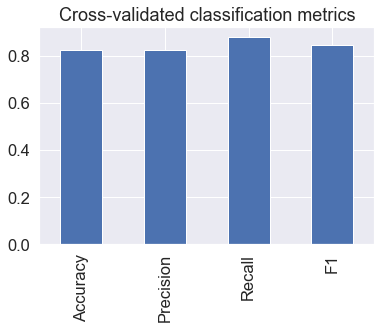

In [179]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame ({"Accuracy": cv_accur_mean,
                           "Precision": cv_precision_mean,
                           "Recall": cv_recall_mean,
                           "F1": cv_f1_mean}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

## Feauture Importance
Features that contributed most to the outcome the model

In [180]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [181]:
# Fit an instance of model with best params
GridSrch_Log_Reg.best_params_

{'C': 206.913808111479, 'solver': 'lbfgs'}

In [184]:
clf = LogisticRegression(C=206.913808111479, solver= 'lbfgs')

clf.fit(X_train, y_train);

In [186]:
# Check coef_
clf.coef_

array([[ 0.01120755, -1.56800736,  0.90571992, -0.01324802, -0.00234326,
         0.02032407,  0.75031373,  0.0275544 , -1.04836752, -0.63424947,
         0.78252075, -0.80229447, -0.99397719]])

In [190]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.011207548198332563,
 'sex': -1.5680073625365283,
 'cp': 0.9057199202238377,
 'trestbps': -0.013248022995992615,
 'chol': -0.002343257009952356,
 'fbs': 0.020324065419027256,
 'restecg': 0.7503137258284378,
 'thalach': 0.027554399945293948,
 'exang': -1.0483675221127067,
 'oldpeak': -0.6342494663197378,
 'slope': 0.7825207517047649,
 'ca': -0.802294469081612,
 'thal': -0.993977193503993}

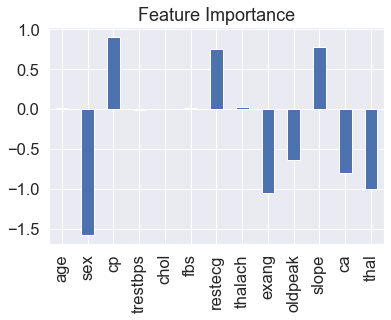

In [199]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend= False);

# 6. Experimentation

In [203]:
# Try Catboost or XGBoost